In [1]:
import mne
from bids import BIDSLayout
from PreProcess.utils.utils import LAB_root
from PreProcess.timefreq.multitaper import spectrogram
from PreProcess.navigate import crop_data, channel_outlier_marker
from task.SentenceRep.events import fix_annotations
import numpy as np
import matplotlib as mpl
try:
    mpl.use("TkAgg")
except ImportError:
    pass
bids_root = mne.datasets.epilepsy_ecog.data_path()
layout = BIDSLayout(LAB_root + "/BIDS-1.0_SentenceRep/BIDS")
filt = mne.io.read_raw_fif(layout.root + "/derivatives/sub-D00" + str(29) + "_" + "SentenceRep" + "_filt_ieeg.fif")

Opening raw data file C:\Users\ae166\Box\CoganLab\BIDS-1.0_SentenceRep\BIDS/derivatives/sub-D0029_SentenceRep_filt_ieeg.fif...
    Range : 0 ... 3805183 =      0.000 ...  1858.000 secs
Ready.
Opening raw data file C:\Users\ae166\Box\CoganLab\BIDS-1.0_SentenceRep\BIDS\derivatives\sub-D0029_SentenceRep_filt_ieeg-1.fif...
    Range : 3805184 ... 7610367 =   1858.000 ...  3716.000 secs
Ready.
Opening raw data file C:\Users\ae166\Box\CoganLab\BIDS-1.0_SentenceRep\BIDS\derivatives\sub-D0029_SentenceRep_filt_ieeg-2.fif...
    Range : 7610368 ... 9328639 =   3716.000 ...  4555.000 secs
Ready.


In [2]:
# Crop raw data to minimize processing time
new = crop_data(filt)

# Mark channel outliers as bad
channel_outlier_marker(new)

# Exclude bad channels
good = new.copy().drop_channels(new.info['bads'])
good.load_data()

# CAR
good.set_eeg_reference(ref_channels="average", ch_type='seeg')

# Remove intermediates from mem
del new

Reading 0 ... 3824503  =      0.000 ...  1867.433 secs...
Applying average reference.
Applying a custom ('sEEG',) reference.


In [3]:
fix_annotations(good)

Used Annotations descriptions: ['Sentence/Audio', 'Sentence/BAD boundary', 'Sentence/EDGE boundary', 'Sentence/Response', 'Sentence/Speak', 'Start/:=:', 'Start/Listen', 'Word/Audio', 'Word/BAD boundary', 'Word/EDGE boundary', 'Word/Mime', 'Word/Response', 'Word/Speak']
Not setting metadata
180 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 180 events and 6145 original time points ...
0 bad epochs dropped
Not setting metadata
270 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 270 events and 3073 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:   54.9s
[Parallel(n_jobs=6)]: Done  66 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 140 out of 140 | elapsed: 11.3min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:   55.1s
[Parallel(n_jobs=6)]: Done  66 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 140 out of 140 | elapsed:  9.6min finished


No baseline correction applied


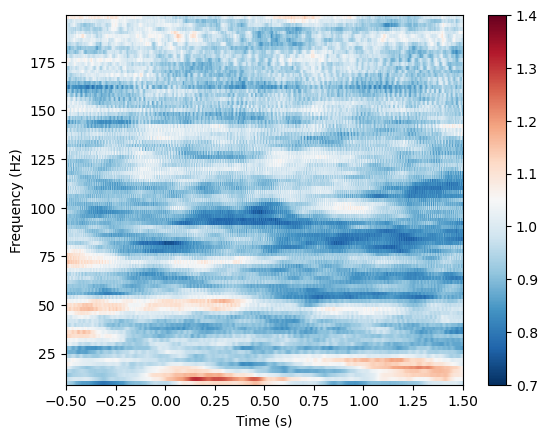

[<Figure size 640x480 with 2 Axes>]

In [4]:
freqs = np.arange(10, 200., 2.)
spectra = spectrogram(good, 'Word/Audio', -0.5, 1.5, 'Start', -0.5, 0, freqs, n_jobs=6, verbose=10)
import matplotlib
%matplotlib inline
spectra.plot([57], vmin=0.7, vmax=1.4)